# Highfield Street Circuit lap time simulation

This Jupyter notebook is one of the two notebooks that you have to complete and submit as part of the FEEG1001 Summative Design Assessment. You should first complete this notebook and then work on the `optfoil.ipynb` notebook.

__NOTE: You will have to use the classical Jupyter Notebook interface, rather than the newer Jupyter Lab, for this assessment to work properly.__

Similar to the labs, this notebook has some sections that have been completed for you already, while in some other cells you will have to write some code. There are four tasks in total in this notebook, with step-to-step guidance. There are some checks to make sure your code works properly. 

Note also that this notebook is a little bit different from other notebooks, as there are some cells that are read-only and can't be modified. You'll have to write your solution in special cells containing the statements

    # YOUR CODE HERE
    raise NotImplementedError
    # END YOUR CODE HERE
    
replacing this with your own code.

## Problem specification

In this notebook, we are considering your race car going around the Highfield Street Circuit. We have developed a simple computational model that estimates the lap time given the quantities $C_LA$ and $C_DA$, i.e. the wing's lift and drag force coefficients multiplied by the reference planform area.

The lap time simulator is given by the python function `simulator` available in the python source file `lapsim.py`. You will need to download `lapsim.py` from Blackboard and save this file in the same folder with this notebook.

We first import numpy and matplotlib, with plots inline within the notebook.

In [1]:
# THIS CELL AND OTHER BELOW ARE SPECIAL AND CANNOT BE EDITED

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Now import the `simulator` function from the `lapsim` module (Note: you need to download `lapsim.py` from Blackboard and save this file in the same directory with this notebook).

In [2]:
# THIS CELL CAN BE EDITED

# Add other imports here if you need to
from lapsim import simulator

In [3]:
# check the docs for `simulator`
?simulator

As you can see this function accepts a two-element array with $C_LA$ and $C_DA$. There is an extra argument, `plotting`. When this argument is set to 1 a plot of speed around the track vs time is shown. 

As an example, let's try out the simulator using $C_LA=1.2$ and $C_DA=0.5$. We'll also set the plotting input argument to 1, so that we get the plot.

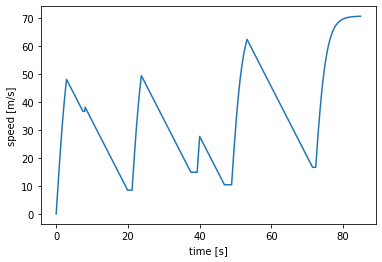

84.91652993929577

In [4]:
# THIS CELL CAN BE EDITED
CLA = 1.2
CDA = 0.1
simulator([CLA, CDA], 1)

The function returns the lap time, which is `84.91652993929577` seconds for $C_DA=0.1$ and $C_LA = 1.2$.


Try changing the values of $C_LA$ and $C_DA$. Note how a low $C_DA$ means that the car accelerates more quickly and has a higher potential top speed, but that a high $C_LA$ is needed to give grip and higher speed round the corners. 

### Task 1 - lap time function 

In the first task, you need to develop a function to return the lap time (the variable `lap_time`) given $C_LA$ and the lift to drag ratio `LonD` of the wing. As discussed above, replace the statement

    # YOUR CODE HERE
    raise NotImplementedError
    # END YOUR CODE HERE

with your own code and note that this syntax applies to every question below.

In [5]:
# THIS CELL CAN BE EDITED

def laptime(CLA, LonD):
    """
    Return the lap time around the Highfield Street Circuit from 
    the quantity `CLA` and the lift to drag ratio `LonD`. No plotting
    should be performed.
    """
    # YOUR CODE HERE
    #CLA = 1.2
    #CDA = 0.1
    lap_time = simulator([CLA, CLA/LonD])
    
    #raise NotImplementedError()
    return lap_time

Check your function works without producing any errors

In [6]:
# THIS CELL CAN BE EDITED
laptime(0.4, 20)

68.68890310822552

Run the test below to check your implementation is correct.

In [7]:
# Check the function `laptime` is implemented correctly
assert np.allclose(laptime(1.2, 12), 84.9165299, atol=0.01)

### Task 2 - Surface plot of lap time

Rather than trial and error to see which values of $C_LA$ and $C_DA$ give the best lap time, we could plot out the lap time for a range of lift and drag coefficients. We'll need to first create an array of $C_LA$ and $C_DA$ values. In the cell below, use `np.linspace` to create `NL=11` values between 0 and 1.0 stored in array `CLA` and `ND=15` values between 0.0 and 0.5 stored in array `CDA`. 

Varying the downforce produced by the wing from 0 to 1.0 is relatively straightforward, as we can easily vary the angle of attack. On the other hand, varying the drag, and in particular decreasing the drag by designing a better airfoil, might be harder. 

In [8]:
# THIS CELL CAN BE EDITED
NL = 11 # number of values for CLA
ND = 15 # number of values for CDA
# YOUR CODE HERE
CLA = np.linspace(0, 1.0, NL)
CDA = np.linspace(0, 0.5, ND)
#raise NotImplementedError()

Let's run some tests to check your code.

In [9]:
# Check CLA and CDA are correct
assert len(CLA) == 11
assert len(CDA) == 15
assert np.allclose(CLA[2], 0.2, atol=0.001)
assert np.allclose(CDA[2], 0.07142857, atol=0.001)

Now, we create a 2D array of lap times called `times` corresponding to all combinations of these values (set plotting to 0 and note this could take a while). We first initialise it and the fill it in. Complete the missing section in the cell below and then run the tests.

In [12]:
# THIS CELL CAN BE EDITED

# drag along the rows, lift along the columns
times = np.zeros((ND, NL))


for iD in range(ND):
    for iL in range(NL):

        # YOUR CODE HERE
        times[iD, iL] = simulator([CLA[iL], CDA[iD]])


In [13]:
# Check 2D array times is correct
assert np.allclose(times[0, 0], 75.59843762218125, atol=0.001)
assert np.allclose(times[1, 1], 73.51373463392072, atol=0.001)

We will now create a contour plot for the lap time, as a function of $C_LA$ and $C_DA$, to visualise the role that the aerodynamics has on the lap time. This information will be key for your airfoil design task. The code below creates the surface plot and saves the resulting image as `laptime.png` in the current directory. Does the code make sense to you?

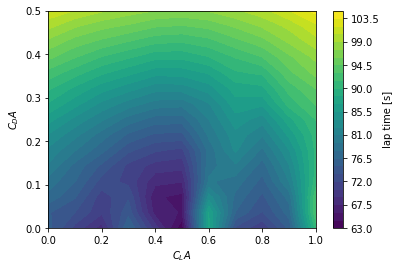

In [26]:
# plot 30 filled contours
plt.contourf(CLA, CDA, times, 30)

# add a colorbar 
plt.colorbar(label="lap time [s]")

# add labels
plt.xlabel('$C_LA$')
plt.ylabel('$C_DA$')

# save figure
plt.savefig('laptime.png', dpi=600)

Now we can see roughly where the best lap time is: $C_DA$ needs to be as low as possible, while it appears there is a value of $C_LA$ which should give a minimal lap time. This suggests that we might want to optimise the airfoil geometry to minimize drag, while satisfying the constraint of approximating $C_LA$ to that target. There also seem to be several local optima, for different values of $C_LA$.

It would be good to get an accurate result for the best $C_LA$ though. We could zoom in the region of the minimum, or use an optimizer.

### Task 3 - Simple optimisation

To get started, we leave the simulator aside and we first try optimizing a simple function of two variables, $x$ and $y$, defined as


$$f(x, y) = (1 - x)^2 + 100 (y -x^2)^2$$

In the optimisation literature, this function is called the [Rosenbrock](https://en.wikipedia.org/wiki/Rosenbrock_function) function and is a popular benchmark for optimisation algorithms. 


You'll need to complete the code below to create a python function that computes the Rosenbrock function.

In [27]:
# THIS CELL CAN BE EDITED

def rosenbrock(xy):
    """
    Compute the value `f` of Rosenbrock function  at point `(x, y) = {xy[0], xy[1]}`, 
    where the argument `xy` is a two-element numpy array or two-element list with
    the x and y variables.
    """
    # YOUR CODE HERE
    f = (1-xy[0])**2 +100*(xy[1]-xy[0]**2)**2
    
   # raise NotImplementedError()
    return f

Check first your code runs properly without error:

In [28]:
# THIS CELL CAN BE EDITED
print(rosenbrock([5, 5]))

40016


In [29]:
# Check rosenbrock function returns correct results
assert np.allclose(rosenbrock([1.0, 2.0]), 100.0, atol=0.001)

The minimum of this function is at $(x, y) = \{1,1\}$, and the mimum value is zero. Let's check::

In [30]:
# this is the minimizer
xy = np.array([1.0, 1.0])

# this should be zero
rosenbrock(xy)

0.0

We should be able to find this result using an optimizer, using Scipy.optimize's `minimize` function. Unlike in other tasks, here we'll used the 'L-BFGS-B' method, which can incorporate bound constraints (see later).

As usual, we pass to `minimize` the name of our function (`rosenbrock`) and an initial guess, the point $(x, y) = \{2,2\}$:

In [31]:
# import minimize
from scipy.optimize import minimize

# initial guess
xy0 = np.array([2.0, 2.0])

# run optimiser
result = minimize(rosenbrock, xy0, method='L-BFGS-B')

# let's print the result
print(result)

      fun: 7.1391328450955025e-12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.22986402e-06, -2.81093759e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 87
      nit: 26
     njev: 29
   status: 0
  success: True
        x: array([0.99999733, 0.99999465])


The optimizer has found the minimum succesfully, with `opt_out.x` close to the actual minimizer and `opt_out.fun` (the objective function at the minimum) very close to zero.

Let's make things a bit more complicated by introducing bound constraints to our problem. Instead of finding the minimum for any value of $(x, y)$, we'll introduce the bound constraints

$$0 < x < 0.5 \quad \mathrm{and} \quad 2 < y < 3.$$

In practice, this means that we are looking for a minimum of the function $f$ in a rectangle on the $(x, y)$ plane. Because the point $\{1, 1\}$ (the minimizer of the unconstrained problem) does not fall into this rectangle, the minimum will likely be different.

We'll also assume that the function might have some 'noise' in the output, so we'll set the minimum finite difference for approximating the gradient in the function (`eps`) to be 0.001 (do not worry if you do not understand what this means, keep going). 

In [32]:
# define the bounds for the constraints, for the x variable and for the y variable
# This can be done by passing a two-element list of two-element lists of floating points numbers 
# for the keyword argument `bounds` in the function minimize
bounds = [[0.0, 0.5], [2.0, 3.0]]

# initial guess that satisfies the bounds constraint
xy0 = [0.2, 2.5]

# call optimiser
result = minimize(rosenbrock, xy0, method='L-BFGS-B', bounds = bounds, options={'eps':0.001})

# print output
print(result)

      fun: 306.5
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-350.7508001,  350.1      ])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.5, 2. ])


Here, we see the minimum is at $(x, y) = \{0.5, 2\}$, i.e. not other point in the rectangle defined above on the $(x, y)$ plane has lower value. 

Hopefully, with this little example you now know how to add bound constraints to an optimisation problem.

### Task 4 - Optimizing lap time

Based on what you've learnt from the above examples, you should now find the optimum values for $C_LA$ and $C_DA$ to minimize the lap time. You'll have to use the `simulator` function created above. 

Clearly, you can't make a wing with zero (or negative) drag! To ensure the optimisation does not violate this simple aerodynamic fact, use the bounds 

$$0.0 < C_LA < 1 \quad \mathrm{and} \quad 0.0 < C_DA < 0.5,$$

with `'eps':0.001`, similar to what we did in the previous task. Based on the analysis you have done in task 2, you should use an appropriate initial guess for the optimisation, like `[0.5, 0.2]`. Store the output of minimize in the variable `result` and use the `L-BFGS-B` method for the optimisation.

In [41]:
# THIS CELL CAN BE EDITED
bounds = [[0.0, 1.0], [0.0, 0.5]]

# initial guess that satisfies the bounds constraint
xy0 = [0.5, 0.2]

# call optimiser
result = minimize(rosenbrock, xy0, method='L-BFGS-B', bounds = bounds, options={'eps':0.001})

# print output
print(result)


      fun: 0.08540416157904128
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.01433376, -0.37963911])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 12
     njev: 24
   status: 0
  success: True
        x: array([0.70809476, 0.5       ])


Now run the lap time simulator using the optimal $C_LA$ and $C_DA$, (stored in `result.x`), but this time plot the speed/time curve:

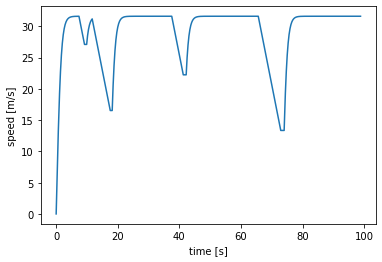

98.81448653576902

In [38]:
simulator(result.x, plotting=1)

Interestingly, low drag values allow high speeds to be reached on the straights and lower lap time! Let's now try to add the optimisation result onto the contour plot we created before.

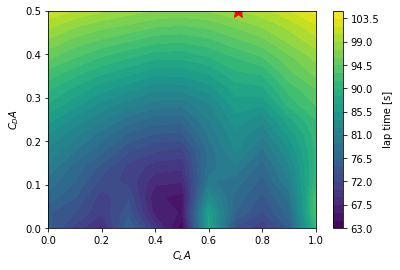

In [39]:
# plot 30 filled contours
plt.contourf(CLA, CDA, times, 30)

# add a colorbar 
plt.colorbar(label="lap time [s]")

# add labels
plt.xlabel('$C_LA$')
plt.ylabel('$C_DA$')

# add location of the optimum with a red star
plt.plot(result.x[0], result.x[1], "r*", ms=15)

# save figure
plt.savefig('laptime_with_optimum.png', dpi=600)

Using the initial guess `[0.5, 2]` we have ended up in a configuration where $C_LA$ has a particular value and $C_DA$ is minimum. This is what we should be trying to achieve in the second notebook, `optfoil.ipynb`.

The optimisation might have ended in a different local optimum, depending on the initial guess. Can you try changing the initial guess and see what effect this has?

We finally check you have implemented the optimisation correctly. If your test fails try changing the initial guess.

In [40]:
# Check that optimizer returns correct result
assert result.fun < 80

__NOTE: Restart the kernel and run all (click "Kernel", "Restart & Run All"), to make sure everything is working correctly before submitting this .ipynb file via Blackboard.__

In [1]:
pwd

'C:\\Users\\jonat'